<center><h1>Day 3:  Classifying the Titanic Data Set with Decision Trees</h1></center>

In today's exercise, you'll use sklearn's **_DecisionTreeClassifier_** class to predict whether or not a passenger survived the Titanic disaster based on indicators about them.  

Also, uh, just in case you haven't seen the movie yet, the Titanic crashes. Spoiler Alert (Apologies to James Cameron).

<center><img src="titanic.jpg"></center>

You'll be repeating most of the work you did in the Data Camp tutorial as prework for today's class--, but with one major difference.  This time, it's all up to you. Each stage will prompt you with the basic steps for importing, cleaning, exploring, training, and testing--but the implementation of each stage will be up to you.  Remember to use the documentation for pandas, numpy, and sklearn as necessary.  If you don't know how to do something, use the internet to figure it out until you do.  You'll be presenting your model during the start of Thursday's class.



<center><h2>Step 1:  Importing and Cleaning the Data</h2></center>

The data set is stored in a file in this folder called "titanic.csv".  Use pandas to import the data set into a data frame.  Call the data frame whatever you like.  How will you deal with missing values?  Once your data set is "clean", remember to split it into a training set and a testing set.  In general, you want to have a 70/30 split between your training and testing sets, respectively.

In [165]:
# Import the Data Set here.  Now, clean your data!  Find missing (NaN) values and deal with them in the manner 
# you think is most appropriate!
import pandas as pd
import numpy as np

dataFrame = pd.read_csv("titanic_data_set.csv")
dataFrame["Age"] = dataFrame["Age"].fillna(dataFrame["Age"].median())
dataFrame = dataFrame.drop(dataFrame.columns[10], axis = 1)
dataFrame = dataFrame.drop(dataFrame.columns[8], axis = 1)

dataFrame["Sex"][dataFrame["Sex"] == "male"] = 0
dataFrame["Sex"][dataFrame["Sex"] == "female"] = 1

dataFrame["Child"] = float('NaN')
dataFrame["Child"][dataFrame["Age"] < 18] = 1
dataFrame["Child"][dataFrame["Age"] >= 18] = 0

dataFrame["Embarked"][dataFrame["Embarked"] == "S"] = 0
dataFrame["Embarked"][dataFrame["Embarked"] == "C"] = 1
dataFrame["Embarked"][dataFrame["Embarked"] == "Q"] = 2

survived = dataFrame["Survived"]
del dataFrame["Survived"]
del dataFrame["Name"]
del dataFrame["Embarked"] # or fill with value

print(dataFrame.isnull().sum())

# Split your data set into training and testing sets. In general, you want to reserve
# around 30% of your data for testing.  
from sklearn.model_selection import train_test_split

# trainX, testX = train_test_split(dataFrame, train_size = 0.7)
X_train, X_test, y_train, y_test = train_test_split(dataFrame, survived, train_size = 0.7)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Child          0
dtype: int64


In [166]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Child'],
      dtype='object')

In [167]:
X_train

PassengerId  Pclass Sex   Age  SibSp  Parch      Fare  Child
526          527       2   1  50.0      0      0   10.5000    0.0
27            28       1   0  19.0      3      2  263.0000    0.0
827          828       2   0   1.0      0      2   37.0042    1.0
762          763       3   0  20.0      0      0    7.2292    0.0
819          820       3   0  10.0      3      2   27.9000    1.0
303          304       2   1  28.0      0      0   12.3500    0.0
444          445       3   0  28.0      0      0    8.1125    0.0
428          429       3   0  28.0      0      0    7.7500    0.0
75            76       3   0  25.0      0      0    7.6500    0.0
5              6       3   0  28.0      0      0    8.4583    0.0
283          284       3   0  19.0      0      0    8.0500    0.0
282          283       3   0  16.0      0      0    9.5000    1.0
670          671       2   1  40.0      1      1   39.0000    0.0
48            49       3   0  28.0      2      0   21.6792    0.0
116          117       3   0  70.5      0      0    7.7500    0.0
377          378       1   0  27.0      0      2  211.5000    0.0
3              4       1   1  35.0      1      0   53.1000    0.0
655          656       2   0  24.0      2      0   73.5000    0.0
285          286       3   0  33.0      0      0    8.6625    0.0
620          621       3   0  27.0      1      0   14.4542    0.0
826          827       3   0  28.0      0      0   56.4958    0.0
855          856       3   1  18.0      0      1    9.3500    0.0
856          857       1   1  45.0      1      1  164.8667    0.0
354          355       3   0  28.0      0      0    7.2250    0.0
430          431       1   0  28.0      0      0   26.5500    0.0
692          693       3   0  28.0      0      0   56.4958    0.0
71            72       3   1  16.0      5      2   46.9000    1.0
227          228       3   0  20.5      0      0    7.2500    0.0
830          831       3   1  15.0      1      0   14.4542    1.0
368          369       3   1  28.0      0      0    7.7500    0.0
..           ...     ...  ..   ...    ...    ...       ...    ...
744          745       3   0  31.0      0      0    7.9250    0.0
58            59       2   1   5.0      1      2   27.7500    1.0
576          577       2   1  34.0      0      0   13.0000    0.0
347          348       3   1  28.0      1      0   16.1000    0.0
128          129       3   1  28.0      1      1   22.3583    0.0
484          485       1   0  25.0      1      0   91.0792    0.0
139          140       1   0  24.0      0      0   79.2000    0.0
494          495       3   0  21.0      0      0    8.0500    0.0
544          545       1   0  50.0      1      0  106.4250    0.0
338          339       3   0  45.0      0      0    8.0500    0.0
433          434       3   0  17.0      0      0    7.1250    1.0
612          613       3   1  28.0      1      0   15.5000    0.0
318          319       1   1  31.0      0      2  164.8667    0.0
330          331       3   1  28.0      2      0   23.2500    0.0
865          866       2   1  42.0      0      0   13.0000    0.0
180          181       3   1  28.0      8      2   69.5500    0.0
871          872       1   1  47.0      1      1   52.5542    0.0
595          596       3   0  36.0      1      1   24.1500    0.0
631          632       3   0  51.0      0      0    7.0542    0.0
697          698       3   1  28.0      0      0    7.7333    0.0
586          587       2   0  47.0      0      0   15.0000    0.0
641          642       1   1  24.0      0      0   69.3000    0.0
863          864       3   1  28.0      8      2   69.5500    0.0
309          310       1   1  30.0      0      0   56.9292    0.0
152          153       3   0  55.5      0      0    8.0500    0.0
438          439       1   0  64.0      1      4  263.0000    0.0
365          366       3   0  30.0      0      0    7.2500    0.0
56            57       2   1  21.0      0      0   10.5000    0.0
346          347       2   1  40.0      0    

<center><h2>Step 2: Exploring the Data</h2></center>

Now, you should explore your data.  Get a feel for it using summary statistics, and graphs!  If you're taking this step seriously, you should be graphing a ton of stuff. Some will end up being useful.  Alot of it won't.  Your job here is to discover which features have the strongest correlation with survival outcomes.  This will become important when we start actually training our Decision Tree Classifier!

In [168]:
# Explore the data set here.  Try and discover what categories correlate the most with the 
# survival chance of the passengers!
import matplotlib.pyplot as plt
%matplotlib inline

X_train.describe()


PassengerId      Pclass         Age       SibSp       Parch  \
count   623.000000  623.000000  623.000000  623.000000  623.000000   
mean    445.550562    2.303371   29.633242    0.545746    0.356340   
std     256.113853    0.831130   13.259056    1.135829    0.757484   
min       2.000000    1.000000    0.420000    0.000000    0.000000   
25%     223.500000    2.000000   22.500000    0.000000    0.000000   
50%     446.000000    3.000000   28.000000    0.000000    0.000000   
75%     666.500000    3.000000   36.000000    1.000000    0.000000   
max     891.000000    3.000000   80.000000    8.000000    5.000000   

             Fare       Child  
count  623.000000  623.000000  
mean    32.270819    0.125201  
std     46.463541    0.331212  
min      0.000000    0.000000  
25%      7.910400    0.000000  
50%     14.500000    0.000000  
75%     31.275000    0.000000  
max    512.329200    1.000000

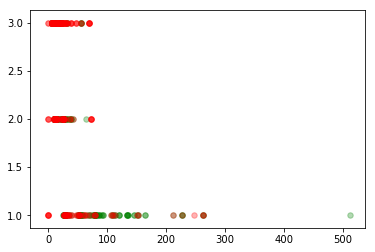

In [169]:
# plt.axis([0, 1000, 0, 4])
plt.scatter(X_train["Fare"][y_train == 1], X_train["Pclass"][y_train == 1], s=30, alpha=0.3, c='g')
plt.scatter(X_train["Fare"][y_train == 0], X_train["Pclass"][y_train == 0], s=30, alpha=0.3, c='r')

In [170]:
plt.scatter(train["Fare"][train["Survived"] == 1], train["Child"][train["Survived"] == 1], s=30, alpha=0.3, c='g')
plt.scatter(train["Fare"][train["Survived"] == 0], train["Child"][train["Survived"] == 0], s=30, alpha=0.3, c='r')

# Higher fares look to increase survivability

KeyError: 'Survived'

In [ ]:
plt.scatter(train["Age"][train["Survived"] == 1], train["Sex"][train["Survived"] == 1], s=30, alpha=0.3, c='g')
plt.scatter(train["Age"][train["Survived"] == 0], train["Sex"][train["Survived"] == 0], s=30, alpha=0.3, c='r')

# women survived too a far greater degree

In [ ]:
plt.scatter(train["Age"][train["Survived"] == 1], train["Pclass"][train["Survived"] == 1], s=30, alpha=0.3, c='g')
plt.scatter(train["Age"][train["Survived"] == 0], train["Pclass"][train["Survived"] == 0], s=30, alpha=0.3, c='r')

<center><h2>Step 3: Training a Classifier</h2></center>

You've cleaned your data, and split into training and testing sets, and explored your data frame.  Now, on to the fun stuff--let's create and train a Decision Tree Classifier!  Create a Decision Tree Classifier and fit it to your training set.  If you're not sure how, check out the sklearn docs for Decision Tree Classifiers!

In [ ]:
# Create and train a Decision Tree Classifier from sklearn.tree. If you're unsure of how to use the 
# Decision Tree Classifier, check out the docs for it--sklearn has some of the best documentation out there!
from sklearn.tree import DecisionTreeClassifier

target = y_train.values
features = X_train[["Pclass", "Sex", "Child", "Fare"]].values
model = DecisionTreeClassifier().fit(features, target)

model.feature_importances_

In [ ]:
model.score(features, target)

<center><h2>Step 4: Evaluating our Model</h2></center>

We've trained our model, but **_can we trust our results?_** Use your Decision Tree Classifier to predict the outcomes of the items in your testing set.  Now that we have the results of our testing set predictions, let's calculate our F1 Score to see how we did.  If you aren't sure how to calculate the F1 Score, refer to the docs! 

In [176]:
# Evaluate your model's accuracy here.  Use your testing set to do--how will you evaluate your model's accuracy?
from sklearn.metrics import f1_score

testTarget = y_test.values
testFeatures = X_test[["Pclass", "Sex", "Child", "Fare"]].values

model.score(testFeatures, testTarget)

0.91417910447761197

In [173]:
prediction = model.predict(testFeatures)

prediction

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [175]:
f1_score(y_test, prediction)

0.36269430051813473

<center><h2>Stretch Challenge: Tuning our Model for Higher Accuracy</h2></center>

Great job!  Now, tweak your model to see how much higher you can get your accuracy score!  Gloves are off--get that F1 Score up.  Every percentage point counts!

(Hint:  Take a look at sklearn's GridSearchCV module!)

In [ ]:
# Stretch challenge--can you tweak your model to get the accuracy up?  How high can you get your accuracy?

